In [1]:
import sys
import pandas as pd
from rdkit import Chem
import warnings
sys.path.append("../")
from tcad.graph_tools import mol_to_torch_data, add_label, train_test_split
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.loader import DataLoader
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../data/data.csv")
data.head()

,assay_type,canonical_smiles,molecule_chembl_id,standard_units,standard_value,target_organism,type
0,B,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,CHEMBL21156,nM,690.0,Homo sapiens,IC50
1,B,CC(O)C(/N=C1/C=C(O)/C(=N\C(C(=O)O)C(C)O)C=C1O)...,CHEMBL327725,nM,3000.0,Homo sapiens,IC50
2,B,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,CHEMBL115220,nM,10000.0,Homo sapiens,IC50
3,B,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,CHEMBL150894,nM,4.0,Homo sapiens,IC50
4,B,O=C(Nc1cccc(C(F)(F)F)c1)c1ccccc1NCc1ccncc1,CHEMBL153843,nM,18.0,Homo sapiens,IC50


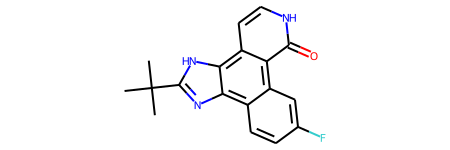

In [3]:
smiles = list(data['canonical_smiles'])
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
labels = list(data['standard_value'])
molecules[0]

In [7]:
dataset = [mol_to_torch_data(mol) for mol in molecules]
dataset = [add_label(graph, label) for graph, label in zip(dataset, labels)]
dataset[0]

Data(x=[23, 6], edge_index=[2, 52], edge_attr=[52], y=690.0)

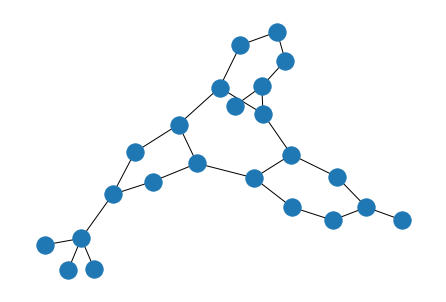

In [8]:
g = to_networkx(dataset[0], to_undirected=True)
nx.draw(g)

In [9]:
batch_size = 64
train_dataset, test_dataset = train_test_split(dataset, 0.3) 
train_data_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size, shuffle=False)